In [2]:
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn import cross_validation
import seaborn as sns
sns.set(style="whitegrid", font_scale=1.5)

import matplotlib.pyplot as plt
# this allows plots to appear directly in the notebook
%matplotlib inline

import sklearn.linear_model

In [3]:
df = pd.read_csv("yellow_tripdata_2015-01-1p.csv")
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,...,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,borough,neighborhood
0,1,1/29/2015 9:00,1/29/2015 9:20,1,1.90,-74.005905,40.735645,1,N,-73.982353,...,1,13.5,0.0,0.5,1.70,0.00,0.3,16.00,Manhattan,West Village
1,1,1/16/2015 21:59,1/16/2015 22:09,1,1.30,-73.988808,40.721855,1,N,-73.990845,...,1,8.0,0.5,0.5,1.85,0.00,0.3,11.15,Manhattan,Lower East Side
2,2,1/9/2015 19:29,1/9/2015 19:35,1,0.35,-73.980316,40.742496,1,N,-73.985909,...,2,5.0,1.0,0.5,0.00,0.00,0.3,6.80,Manhattan,Kips Bay
3,1,1/28/2015 14:28,1/28/2015 14:48,2,7.90,-73.873108,40.774086,1,N,-73.954384,...,1,24.0,0.0,0.5,0.00,5.33,0.3,30.13,Queens,LaGuardia Airport
4,2,1/22/2015 7:08,1/22/2015 7:14,1,1.29,-73.961906,40.763901,1,N,-73.975761,...,1,6.5,0.0,0.5,1.46,0.00,0.3,8.76,Manhattan,Upper East Side


In [4]:
df['log_total_amount'] = df['total_amount'].apply(lambda x: np.log(x))
#df['log_tip_amount'] = df['tip_amount'].apply(lambda x: np.log(x))
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,borough,neighborhood,log_total_amount
0,1,1/29/2015 9:00,1/29/2015 9:20,1,1.90,-74.005905,40.735645,1,N,-73.982353,...,13.5,0.0,0.5,1.70,0.00,0.3,16.00,Manhattan,West Village,2.772589
1,1,1/16/2015 21:59,1/16/2015 22:09,1,1.30,-73.988808,40.721855,1,N,-73.990845,...,8.0,0.5,0.5,1.85,0.00,0.3,11.15,Manhattan,Lower East Side,2.411439
2,2,1/9/2015 19:29,1/9/2015 19:35,1,0.35,-73.980316,40.742496,1,N,-73.985909,...,5.0,1.0,0.5,0.00,0.00,0.3,6.80,Manhattan,Kips Bay,1.916923
3,1,1/28/2015 14:28,1/28/2015 14:48,2,7.90,-73.873108,40.774086,1,N,-73.954384,...,24.0,0.0,0.5,0.00,5.33,0.3,30.13,Queens,LaGuardia Airport,3.405521
4,2,1/22/2015 7:08,1/22/2015 7:14,1,1.29,-73.961906,40.763901,1,N,-73.975761,...,6.5,0.0,0.5,1.46,0.00,0.3,8.76,Manhattan,Upper East Side,2.170196


In [5]:
print df.dtypes

VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
pickup_longitude         float64
pickup_latitude          float64
RateCodeID                 int64
store_and_fwd_flag        object
dropoff_longitude        float64
dropoff_latitude         float64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
borough                   object
neighborhood              object
log_total_amount         float64
dtype: object


In [6]:
df.describe()

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,log_total_amount
count,127490.000000,127490.000000,127490.000000,127490.000000,127490.000000,127490.000000,127490.000000,127490.000000,127490.000000,127490.000000,127490.000000,127490.000000,127490.000000,127490.000000,127490.000000,127490.000000,1.274530e+05
mean,1.520535,1.681567,2.782500,-72.543729,39.962788,1.036921,-72.590987,39.989797,1.385293,11.900871,0.308217,0.497776,1.561781,0.243486,0.283276,14.811335,-inf
std,0.499580,1.340551,3.403465,10.188356,5.612579,0.668754,10.020768,5.520446,0.498167,10.110382,0.361912,0.035273,3.353501,1.210873,0.068829,12.514612,NaN
min,1.000000,0.000000,0.000000,-75.254013,0.000000,1.000000,-75.254036,0.000000,1.000000,-75.000000,-1.000000,-0.500000,-1.000000,0.000000,0.000000,-75.300000,-inf
25%,1.000000,1.000000,1.000000,-73.991631,40.735592,1.000000,-73.991173,40.734398,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.160000,2.099244e+00
50%,2.000000,1.000000,1.675000,-73.981575,40.753128,1.000000,-73.979752,40.753632,1.000000,9.000000,0.000000,0.500000,1.000000,0.000000,0.300000,11.160000,2.412336e+00
75%,2.000000,2.000000,3.000000,-73.966629,40.767555,1.000000,-73.962555,40.768742,2.000000,13.500000,0.500000,0.500000,2.080000,0.000000,0.300000,16.300000,2.791165e+00
max,2.000000,6.000000,99.900000,0.000000,41.570671,99.000000,0.000000,41.745903,4.000000,551.110000,7.000000,0.500000,700.000000,29.750000,0.300000,732.300000,6.596190e+00


In [7]:
def get_dt(x):
    return datetime.strptime(x, '%m/%d/%Y %H:%M')

df['tpep_pickup_datetime'] = df.apply(lambda x: get_dt(x[1]), axis=1)
df['tpep_dropoff_datetime'] = df.apply(lambda x: get_dt(x[2]), axis=1)

df['tpep_pickup_dayofweek'] = df['tpep_pickup_datetime'].dt.dayofweek
#df['tpep_dropoff_dayofweek'] = df['tpep_dropoff_datetime'].dt.dayofweek

#df['tpep_pickup_time'] = df['tpep_pickup_time'].astype("int")
df['tpep_pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

#df['tpep_pickup_minuteofday'] = df['tpep_pickup_time'].apply(lambda x: x.hour) * 60 + df['tpep_pickup_time'].apply(lambda x: x.minute)
#df['tpep_dropoff_time'] = df['tpep_dropoff_datetime'].dt.time

In [8]:
df = df.drop(['store_and_fwd_flag',
              'pickup_longitude',
              'pickup_latitude',
              'tpep_pickup_datetime', 
              'tpep_dropoff_datetime',
              'dropoff_longitude',
              'dropoff_latitude'], axis=1)

In [9]:
df = df[df['RateCodeID'] == 1]
df = df[df['borough'] == 'Manhattan']
df = df[df['passenger_count']!= 0]
df = df[df['trip_distance']!= 0]
df = df[df['fare_amount'] > 0]
df = df[df['borough']!= '0']
df.head()

,VendorID,passenger_count,trip_distance,RateCodeID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,borough,neighborhood,log_total_amount,tpep_pickup_dayofweek,tpep_pickup_hour
0,1,1,1.90,1,1,13.5,0.0,0.5,1.70,0.0,0.3,16.00,Manhattan,West Village,2.772589,3,9
1,1,1,1.30,1,1,8.0,0.5,0.5,1.85,0.0,0.3,11.15,Manhattan,Lower East Side,2.411439,4,21
2,2,1,0.35,1,2,5.0,1.0,0.5,0.00,0.0,0.3,6.80,Manhattan,Kips Bay,1.916923,4,19
4,2,1,1.29,1,1,6.5,0.0,0.5,1.46,0.0,0.3,8.76,Manhattan,Upper East Side,2.170196,3,7
5,1,1,1.30,1,1,11.5,0.0,0.5,2.45,0.0,0.3,14.75,Manhattan,Upper East Side,2.691243,1,13


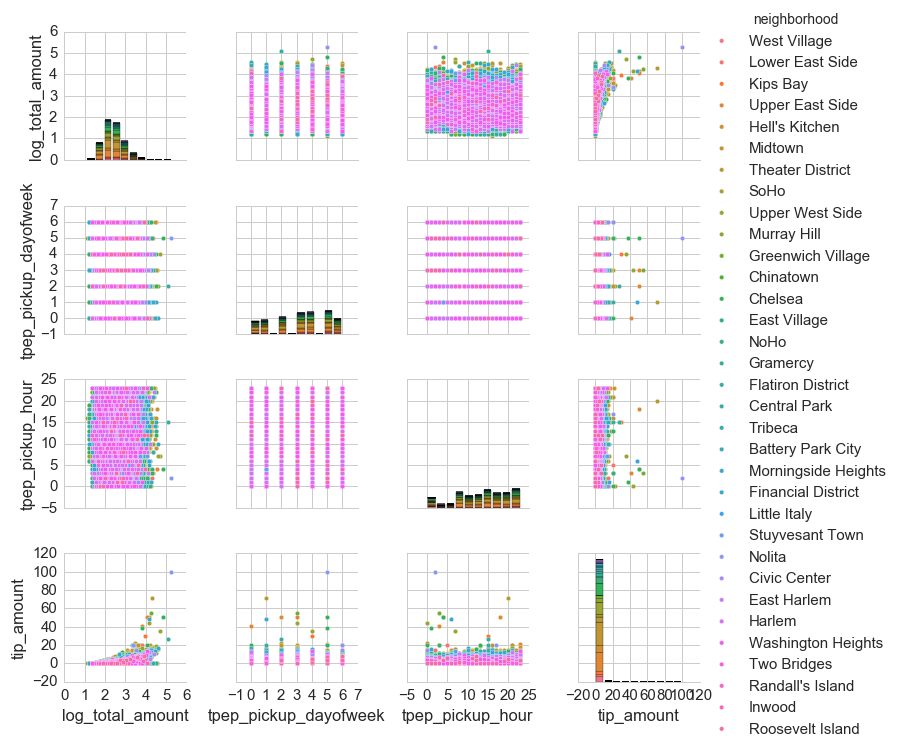

In [10]:
g = sns.pairplot(df, vars=['log_total_amount', 'tpep_pickup_dayofweek', 'tpep_pickup_hour', 'tip_amount'], hue="neighborhood")

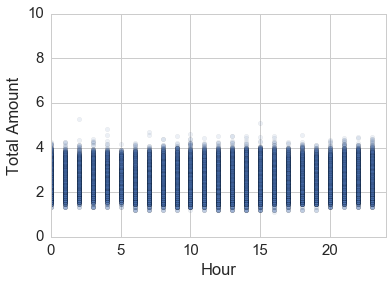

In [11]:
# visualize the relationship between the features and the response using scatterplots
df.plot(kind ='scatter', x='tpep_pickup_hour', y='log_total_amount', alpha=0.1)
plt.xlabel('Hour')
plt.ylabel('Total Amount')
plt.axis([0, 24, 0, 10])
plt.grid(True)
plt.show()

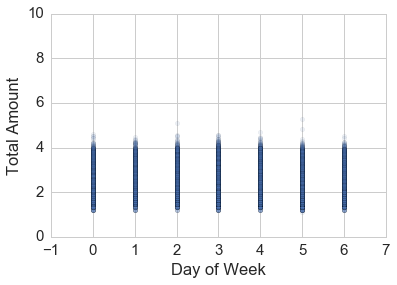

In [12]:
# visualize the relationship between the features and the response using scatterplots
df.plot(kind ='scatter', x='tpep_pickup_dayofweek', y='log_total_amount', alpha=0.1)
plt.xlabel('Day of Week')
plt.ylabel('Total Amount')
plt.axis([-1, 7, 0, 10])
plt.grid(True)
plt.show()

(0, 10)

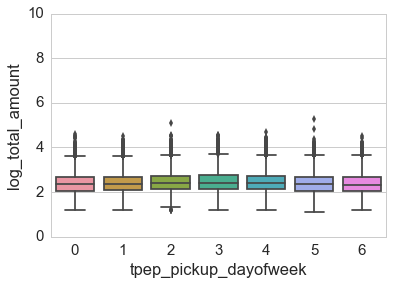

In [13]:
sns.boxplot(x='tpep_pickup_dayofweek', y='log_total_amount', data=df)
plt.ylim(0, 10)

(0, 10)

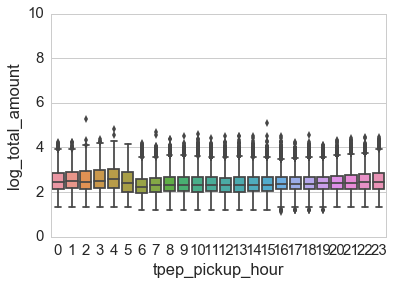

In [14]:
sns.boxplot(x='tpep_pickup_hour', y='log_total_amount', data=df)
plt.ylim(0, 10)

In [15]:
df = df.join(pd.get_dummies(df['tpep_pickup_hour'], prefix='hour'))
df = df.join(pd.get_dummies(df['tpep_pickup_dayofweek'], prefix='week'))
df = df.join(pd.get_dummies(df['neighborhood'], prefix='n'))
#df = pd.get_dummies(df).astype(np.int8)
df.head()

,VendorID,passenger_count,trip_distance,RateCodeID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,...,n_Roosevelt Island,n_SoHo,n_Stuyvesant Town,n_Theater District,n_Tribeca,n_Two Bridges,n_Upper East Side,n_Upper West Side,n_Washington Heights,n_West Village
0,1,1,1.90,1,1,13.5,0.0,0.5,1.70,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,1,1.30,1,1,8.0,0.5,0.5,1.85,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,1,0.35,1,2,5.0,1.0,0.5,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,1,1.29,1,1,6.5,0.0,0.5,1.46,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,1,1,1.30,1,1,11.5,0.0,0.5,2.45,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [16]:
df = df.drop(['VendorID',
              'neighborhood',
              'RateCodeID',
              'tpep_pickup_dayofweek',
              'tpep_pickup_hour',
              'borough'], axis=1)

In [17]:
df.dtypes

passenger_count            int64
trip_distance            float64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
log_total_amount         float64
hour_0                   float64
hour_1                   float64
hour_2                   float64
hour_3                   float64
hour_4                   float64
hour_5                   float64
hour_6                   float64
hour_7                   float64
hour_8                   float64
hour_9                   float64
hour_10                  float64
hour_11                  float64
hour_12                  float64
hour_13                  float64
hour_14                  float64
hour_15                  float64
hour_16                  float64
hour_17                  float64
hour_18                  float64
          

                       passenger_count  trip_distance  payment_type  \
passenger_count               1.000000       0.013355      0.012447   
trip_distance                 0.013355       1.000000     -0.073015   
payment_type                  0.012447      -0.073015      1.000000   
fare_amount                   0.012868       0.955220     -0.080320   
extra                         0.004660       0.043392     -0.028708   
mta_tax                       0.001030       0.000089      0.002164   
tip_amount                   -0.009920       0.461008     -0.624264   
tolls_amount                  0.005445       0.428788     -0.025733   
improvement_surcharge         0.045664      -0.014681     -0.048589   
total_amount                  0.009260       0.939281     -0.208956   
log_total_amount              0.009371       0.854448     -0.270350   
hour_0                        0.008778       0.053281     -0.002939   
hour_1                        0.008683       0.054790     -0.010532   
hour_2

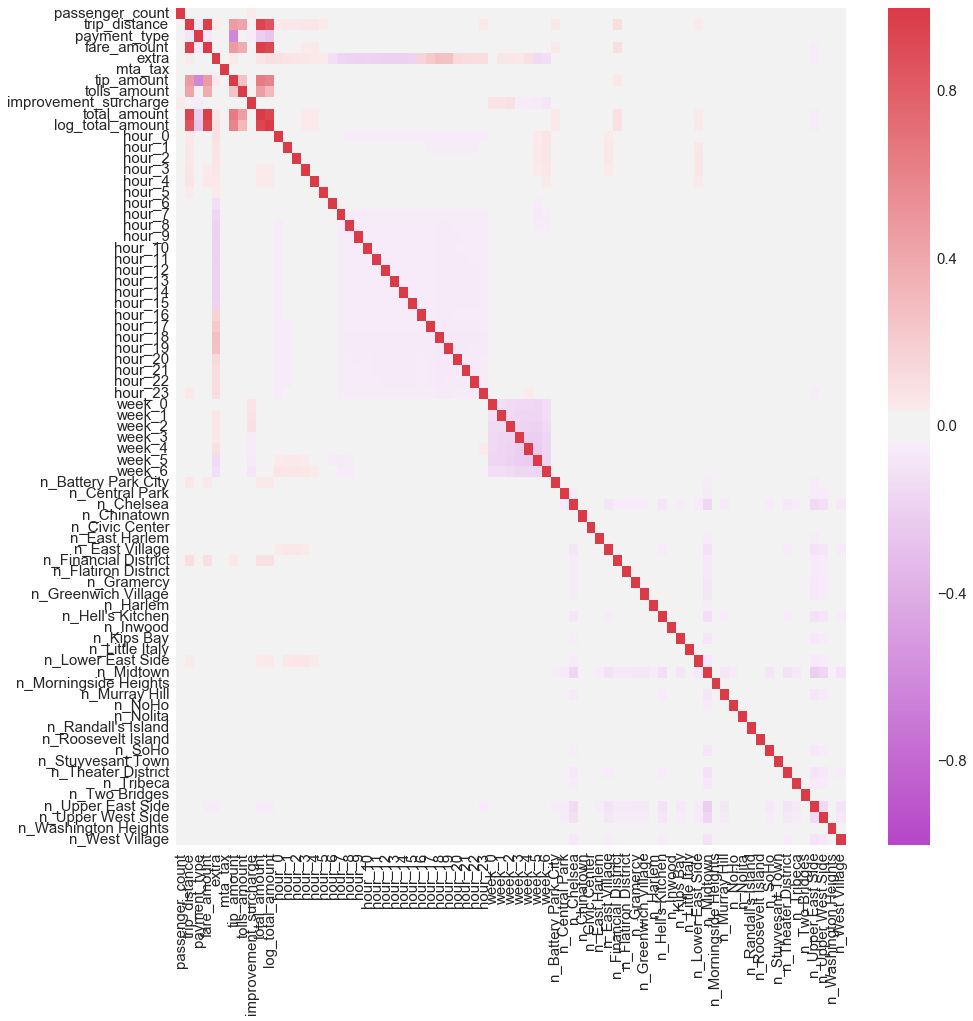

In [18]:
f, ax = plt.subplots(figsize=(15, 15))
cmap = sns.diverging_palette(300, 10, as_cmap=True)

correlations = df.corr()
print correlations
print sns.heatmap(correlations, cmap=cmap, ax=ax)

In [86]:
import statsmodels.formula.api as smf

y = df['log_total_amount']
log_y = np.log10(y+1)
lm = smf.ols(formula=' log_y ~ week_1 + hour_0 + hour_1 + hour_2 + hour_3 + hour_4 + hour_5 + hour_6 + hour_7 + hour_8 + hour_9 + hour_10 + hour_11 + hour_12 + hour_13 + hour_14 + hour_15 + hour_16 + hour_18 + hour_19 + hour_20 + hour_21 + hour_22 + hour_23' , data=df).fit()
#print the full summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  log_y   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     81.03
Date:                Sat, 30 Jul 2016   Prob (F-statistic):               0.00
Time:                        06:48:43   Log-Likelihood:             1.6183e+05
No. Observations:              114539   AIC:                        -3.236e+05
Df Residuals:                  114514   BIC:                        -3.234e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.5307      0.001    692.454      0.000         0.529     0.532
week_1         0.0006      0.001      1.077      0.282        -0.000     0.002
hour_0         0.0115      0.001      9.638      0.000         0.009     0.014
hour_1         0.0135      0.001     10.401      0.000         0.011     0.016
hour_2         0.0134      0.001      9.389      0.000         0.011     0.016
hour_3         0.0180      0.002     11.211      0.000         0.015     0.021
hour_4         0.0212      0.002     11.391      0.000         0.018     0.025
hour_5         0.0071      0.002      3.563      0.000         0.003     0.011
hour_6        -0.0135      0.001     -9.268      0.000        -0.016    -0.011
hour_7        -0.0086      0.001     -7.141      0.000        -0.011    -0.006
hour_8        -0.0046      0.001     -4.077      0.000        -0.007    -0.002
hour_9        -0.0049      0.001     -4.473      0.000        -0.007    -0.003
hour_10       -0.0072      0.001     -6.455      0.000        -0.009    -0.005
hour_11       -0.0066      0.001     -6.053      0.000        -0.009    -0.004
hour_12       -0.0087      0.001     -8.057      0.000        -0.011    -0.007
hour_13       -0.0073      0.001     -6.702      0.000        -0.009    -0.005
hour_14       -0.0066      0.001     -6.074      0.000        -0.009    -0.004
hour_15       -0.0049      0.001     -4.521      0.000        -0.007    -0.003
hour_16       -0.0019      0.001     -1.677      0.093        -0.004     0.000
hour_18        0.0024      0.001      2.344      0.019         0.000     0.004
hour_19        0.0019      0.001      1.842      0.065        -0.000     0.004
hour_20        0.0032      0.001      2.997      0.003         0.001     0.005
hour_21        0.0055      0.001      5.180      0.000         0.003     0.008
hour_22        0.0092      0.001      8.605      0.000         0.007     0.011
hour_23        0.0106      0.001      9.478      0.000         0.008     0.013
==============================================================================
Omnibus:                      655.668   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              660.386
Skew:                           0.179   Prob(JB):                    3.97e-144
Kurtosis:                       2.901   Cond. No.                         22.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
import statsmodels.formula.api as smf

y = df['log_total_amount']
log_y = np.log10(y+1)
lm = smf.ols(formula=' log_y ~ week_0 + week_1 + week_2 + week_3 + week_4 + week_5 + week_6' , data=df).fit()
#print the full summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  log_y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     49.81
Date:                Fri, 29 Jul 2016   Prob (F-statistic):           3.02e-71
Time:                        14:47:43   Log-Likelihood:             1.6104e+05
No. Observations:              114539   AIC:                        -3.221e+05
Df Residuals:                  114531   BIC:                        -3.220e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept  -1.251e+09   2.95e+09     -0.425      0.671     -7.03e+09  4.52e+09
week_0      1.251e+09   2.95e+09      0.425      0.671     -4.52e+09  7.03e+09
week_1      1.251e+09   2.95e+09      0.425      0.671     -4.52e+09  7.03e+09
week_2      1.251e+09   2.95e+09      0.425      0.671     -4.52e+09  7.03e+09
week_3      1.251e+09   2.95e+09      0.425      0.671     -4.52e+09  7.03e+09
week_4      1.251e+09   2.95e+09      0.425      0.671     -4.52e+09  7.03e+09
week_5      1.251e+09   2.95e+09      0.425      0.671     -4.52e+09  7.03e+09
week_6      1.251e+09   2.95e+09      0.425      0.671     -4.52e+09  7.03e+09
==============================================================================
Omnibus:                      693.250   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              696.002
Skew:                           0.182   Prob(JB):                    7.33e-152
Kurtosis:                       2.887   Cond. No.                     5.10e+13
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.06e-23. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [82]:
# Set target variable name
target = 'log_total_amount'

# Set X and y
X = df.drop([target, 'total_amount', 'tip_amount', 'fare_amount', 'extra', 'tolls_amount', 'payment_type', 'improvement_surcharge', 'passenger_count', 'mta_tax'], axis=1)
y = df[target]


# Create separate training and test sets with 60/40 train/test split
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.4, random_state=0)


# check size of training set
print X_train.shape, y_train.shape

# check size of test set
print X_test.shape, y_test.shape

(68723, 65) (68723,)
(45816, 65) (45816,)


Axes(0.125,0.125;0.775x0.775)


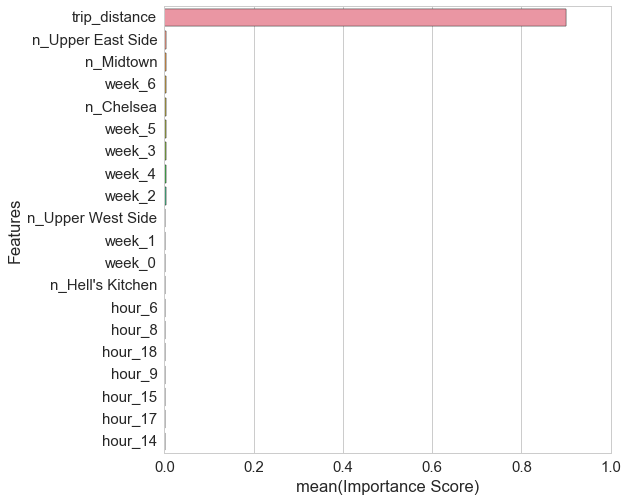

In [83]:
from sklearn import datasets
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# random forest code
rf = RandomForestRegressor(n_estimators=100, min_samples_split=2, n_jobs=-1)
# fit the training data
#print('fitting the model')
rf.fit(X_train, y_train)

# Plot feature importances
feature_names = X.columns
feature_importances = rf.feature_importances_
feature_dict = dict(zip(feature_names, feature_importances))

features_df = pd.DataFrame(feature_dict.items(), columns=['Features', 'Importance Score'])
features_df.sort_values('Importance Score', inplace=True, ascending=False)

f, ax = plt.subplots(figsize=(8, 8))
print sns.barplot(y='Features', x='Importance Score', data=features_df, ax=ax)
sns.barplot(y='Features', x='Importance Score', data=features_df.head(20))

In [85]:
new_test = X.sample(1)

print new_test

pred_for_new_test = rf.predict(new_test)

print pred_for_new_test

       trip_distance  hour_0  hour_1  hour_2  hour_3  hour_4  hour_5  hour_6  \
44203            1.2     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       hour_7  hour_8       ...        n_Roosevelt Island  n_SoHo  \
44203     0.0     0.0       ...                       0.0     0.0   

       n_Stuyvesant Town  n_Theater District  n_Tribeca  n_Two Bridges  \
44203                0.0                 0.0        0.0            0.0   

       n_Upper East Side  n_Upper West Side  n_Washington Heights  \
44203                0.0                0.0                   0.0   

       n_West Village  
44203             0.0  

[1 rows x 65 columns]
[ 2.26767473]
